In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [74]:
# Extracts coin code from filename
def extract_coin_code(filename):
    # extract_coin_code("CRIX.UPBIT.KRW-BTC_2017-11-01_2017-12-19.csv")
    return filename.split(".")[2].split("_")[0].split("-")[1]

In [75]:
# Reads and extracts close price from csv into a dataframe
def read_dataframe(filepath, coin_code):
    df = pd.read_csv(filepath, index_col=["date"])
    df = df.drop_duplicates() # remove duplicates
    df = df.loc[:, ["close"]] # extract close price only
    df.rename(columns={"close": coin_code}, inplace=True) # replace column name
    return df;

In [76]:
master_df = None
directory = os.path.join("./data")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            coin_code = extract_coin_code(file)
            df = read_dataframe(os.path.join(directory, file), coin_code)
            master_df = master_df.join(df, how="outer") if master_df is not None else df

In [89]:
print(len(master_df), " records found.")
print("Contains null value? ", master_df.isnull().values.any())

# Fill null values with ffill followed by bfill
df = master_df.ffill().bfill()
print("Contains null value? ", df.isnull().values.any())

69945  records found.
Contains null value?  True
Contains null value?  False


In [93]:
print(df.corr())

            ADA      ARDR       ARK       BCC       BTC       BTG      DASH  \
ADA    1.000000  0.859036  0.903295  0.648091  0.799260  0.242312  0.830811   
ARDR   0.859036  1.000000  0.903457  0.707344  0.928820  0.176993  0.882697   
ARK    0.903295  0.903457  1.000000  0.757418  0.865114  0.331521  0.897062   
BCC    0.648091  0.707344  0.757418  1.000000  0.686151  0.519752  0.869159   
BTC    0.799260  0.928820  0.865114  0.686151  1.000000  0.147893  0.890946   
BTG    0.242312  0.176993  0.331521  0.519752  0.147893  1.000000  0.389760   
DASH   0.830811  0.882697  0.897062  0.869159  0.890946  0.389760  1.000000   
EMC2   0.759807  0.874672  0.853652  0.651636  0.960162  0.095818  0.839874   
ETC    0.788215  0.836766  0.881029  0.861230  0.866408  0.424063  0.958646   
ETH    0.859741  0.944096  0.897955  0.820698  0.893859  0.408244  0.946176   
GRS    0.794995  0.847453  0.845983  0.484882  0.819766  0.152065  0.733351   
KMD    0.892405  0.892026  0.920870  0.619765  0.872

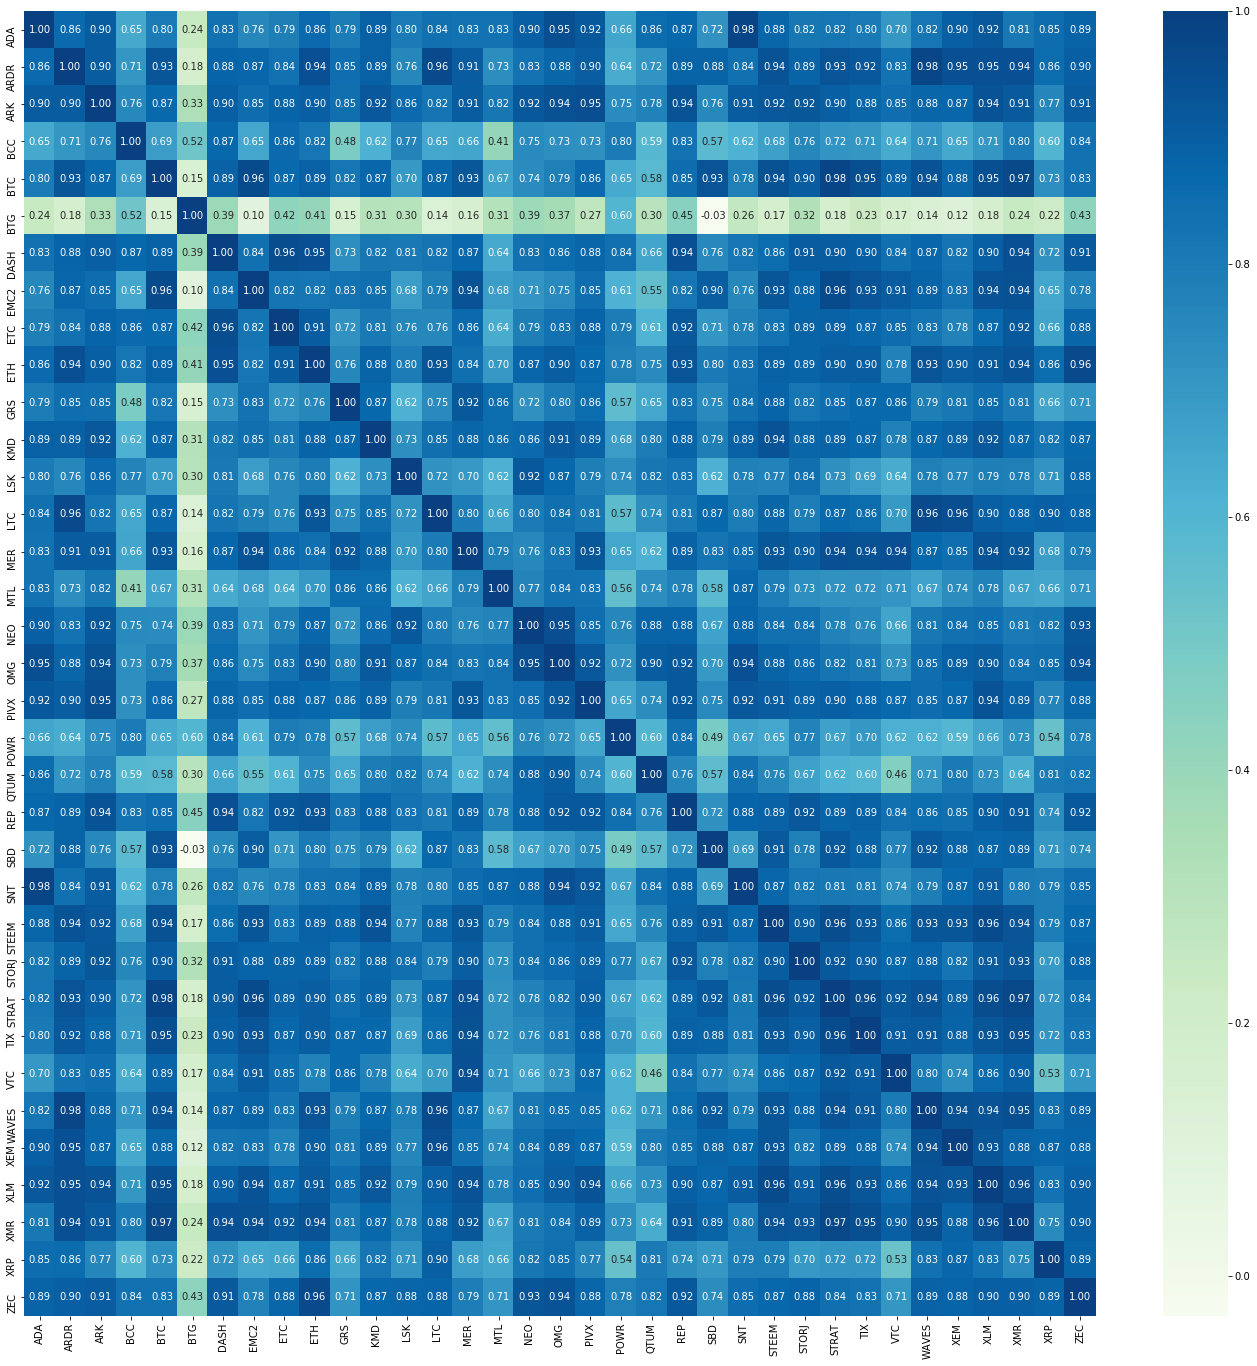

In [94]:
# calculate correlation
plt.figure(figsize=(24, 24)) 
heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="GnBu")
heatmap.get_figure().savefig("./fig/coin_correlation.png");